In [1]:
!pip install numpy


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

print("Done with library declaration, Current version of Tensorflow is: ", tf.__version__)

Done with library declaration, Current version of Tensorflow is:  2.18.0


**Step 2** : Load and transform data. 

In [3]:
# collect directory
data_dir = Path(r"\\LAPTOP-FAIOF8IE\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images")

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)

# display class names
print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


**Step 3** : Plot and inspect the classes in the data. 

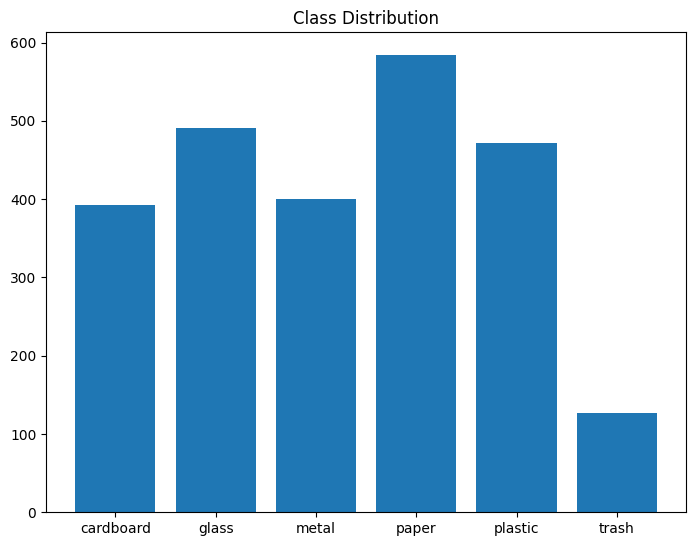

In [4]:
# display class distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

**Step 4** : Split and store the data into train and test data. 

In [5]:
PATH_TEST = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images"
PATH_TRAIN = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [6]:
imagepath_cardboard = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\cardboard"
graypath_cardboard = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '\\' + file, "JPEG")

In [7]:
imagepath_glass = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\glass"
graypath_glass = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '\\' + file, "JPEG")

In [8]:
imagepath_metal = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\metal"
graypath_metal = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '\\' + file, "JPEG")

In [9]:
imagepath_paper = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\paper"
graypath_paper = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '\\' + file, "JPEG")

In [10]:
imagepath_plastic = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\plastic"
graypath_plastic = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '\\' + file, "JPEG")

In [11]:
imagepath_trash = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\original_images\trash"
graypath_trash = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '\\' + file, "JPEG")

In [12]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [13]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

1. ``len(os.listdir(PATH_TRAIN))`` - it allows to display the list of file in the  ***PATH_TRAIN***. It returns the total count of the list in the specified path. 

In [14]:
len(os.listdir(PATH_TRAIN))

6

1. ``IMG_HEIGHT = 32`` <br>
``IMG_WIDTH = 32`` <br>

In [15]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

1. ``image_gen = ImageDataGenerator(rescale=1./255)`` - Using the Keras ImageDataGeneratorclass, it can easily transform the image to range from range ***0,255*** to ***0,1***

In [16]:
image_gen = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [18]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


**Step 5** : Display and examine the images from the dataset.

In [19]:
#plt.figure()
#plt.imshow(sample_training_images[0])
#plt.show()
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _= next(sample_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,4, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 2527 images belonging to 6 classes.


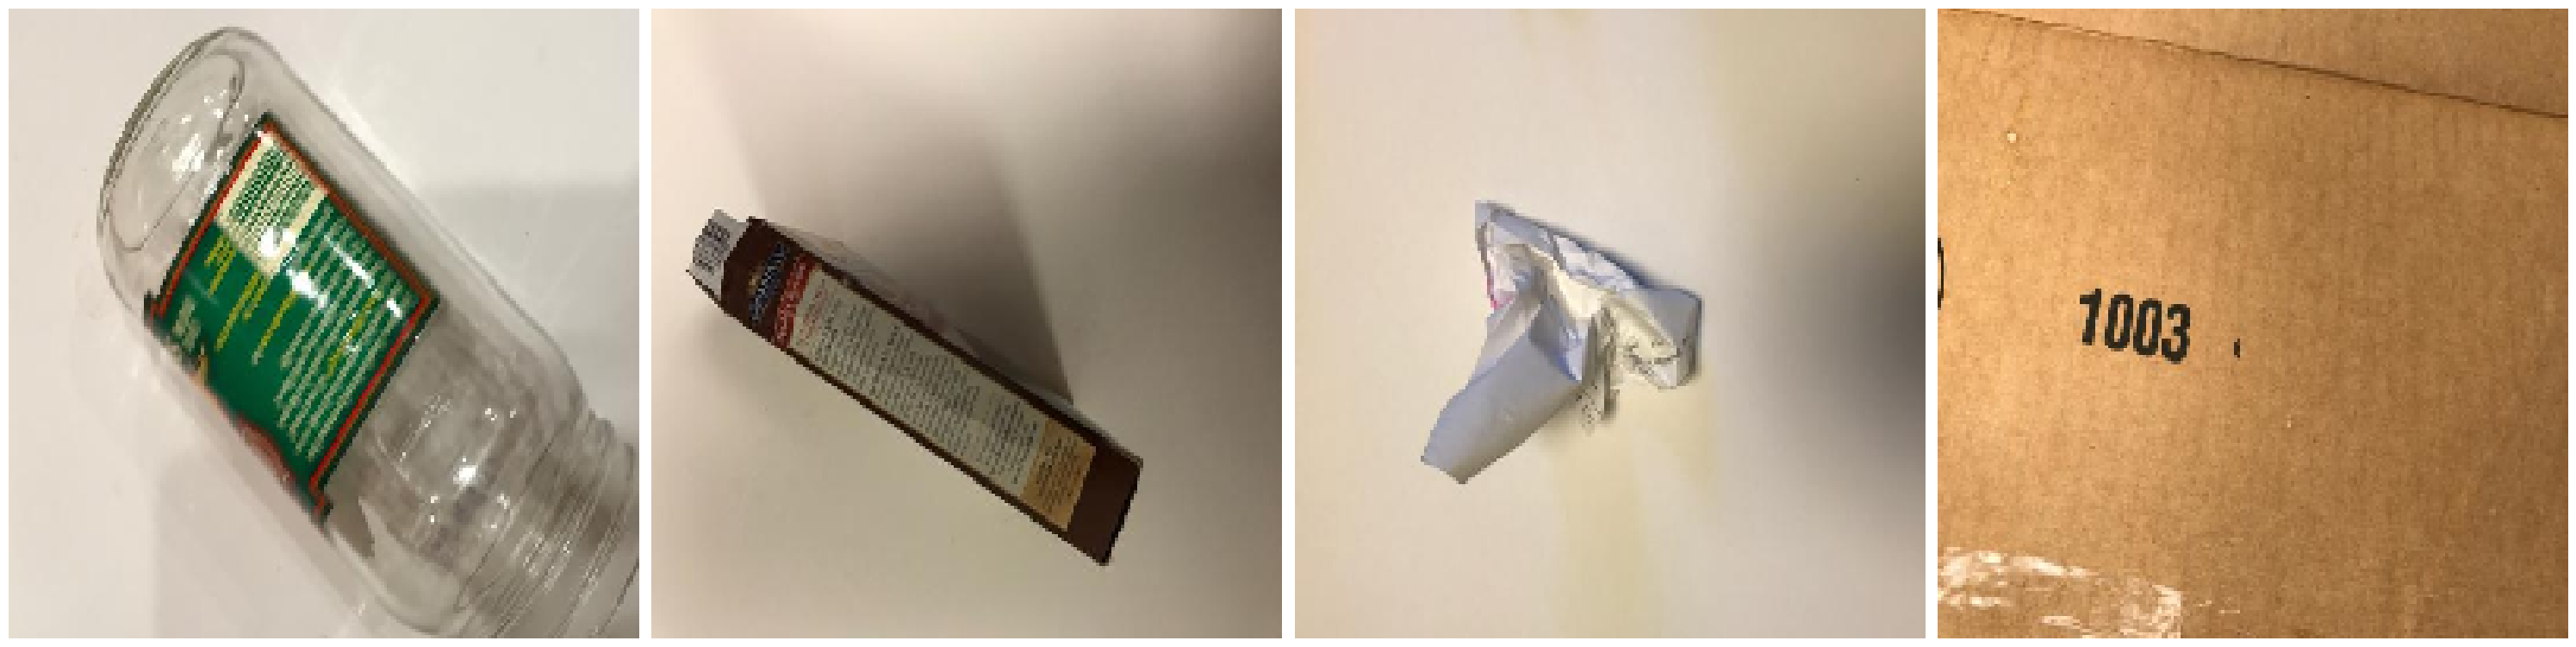

In [20]:
plotImages(sample_training_images[:4])

**Step 6** : Builing theee the Neural Network by using the Sequentil API

In [21]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 7** : Defining an optimmizer, a loss function, and other useful training parameters.

In [22]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,878 (187.02 KB)

 Trainable params: 47,878 (187.02 KB)

 Non-trainable params: 0 (0.00 B)

**Step 8** : Training the model by using the train dataset.

In [23]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

In [24]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 326ms/step - accuracy: 0.1991 - loss: 1.7492 - val_accuracy: 0.2494 - val_loss: 1.6909
Epoch 2/60
27/52 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2580 - loss: 1.6572

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.2598 - loss: 1.6551 - val_accuracy: 0.2946 - val_loss: 1.6297
Epoch 3/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2590 - loss: 1.6560 - val_accuracy: 0.3198 - val_loss: 1.6098
Epoch 4/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3380 - loss: 1.6049 - val_accuracy: 0.3750 - val_loss: 1.5621
Epoch 5/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.3678 - loss: 1.5465 - val_accuracy: 0.3884 - val_loss: 1.4719
Epoch 6/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3883 - loss: 1.4853 - val_accuracy: 0.4012 - val_loss: 1.4177
Epoch 7/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.3956 - loss: 1.4227 - val_accuracy: 0.4057 - val_loss: 1.3982
Epoch 8/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4511 - loss: 1.3604 - val_accuracy: 0.4436 - val_loss: 1.3775
Epoch 9/60
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4889 - loss: 1.2903 - val_accuracy: 0.4838 - val_loss: 1.

**Step 9** : Evaluating the performance of the model using the test dataset.

In [25]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.8340 - loss: 0.4489
Test accuracy: 84.28966999053955 Test Loss: 0.4385354816913605 


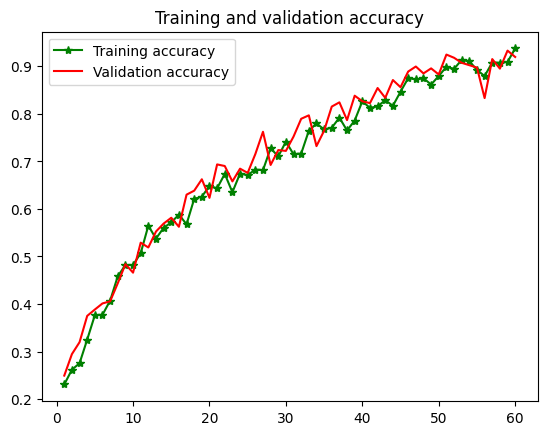

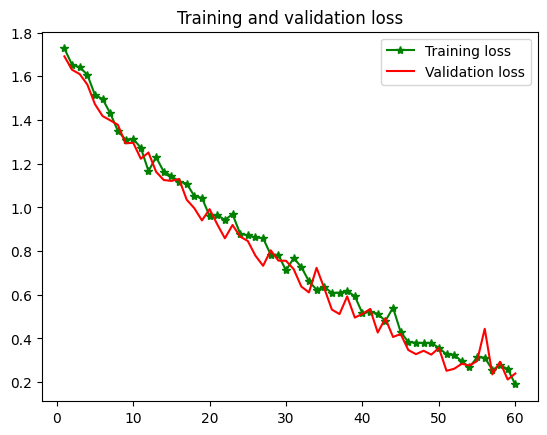

In [26]:
train_acc = history.history['accuracy'] # store training accuracy in history
val_acc = history.history['val_accuracy'] # store validation accuracy in history
train_loss = history.history['loss'] # store training loss in history
val_loss = history.history['val_loss'] # store validation loss in history

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Below shows that the CNN successfully classifies majority of all different household garbage. However, there is a great probability to some classes that the model may mistake garbage with glass and metal, or paper and glass.

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step  


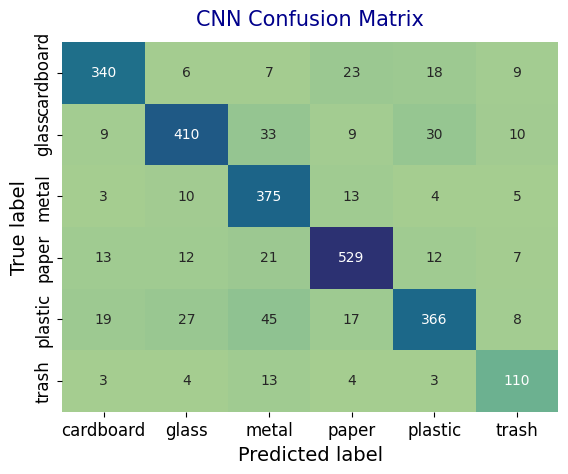

Classification Report
              precision    recall  f1-score   support

   cardboard       0.88      0.84      0.86       403
       glass       0.87      0.82      0.85       501
       metal       0.76      0.91      0.83       410
       paper       0.89      0.89      0.89       594
     plastic       0.85      0.76      0.80       482
       trash       0.74      0.80      0.77       137

    accuracy                           0.84      2527
   macro avg       0.83      0.84      0.83      2527
weighted avg       0.85      0.84      0.84      2527



In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Extract all test data and labels from the test data generator
X_test, y_test = [], []
for i in range(len(test_data_gen)):
    X_batch, y_batch = test_data_gen[i]
    X_test.extend(X_batch)
    y_test.extend(y_batch)

X_test = np.array(X_test)
y_test = np.array(y_test)

# Predict with the model
Y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(Y_test_pred, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Visualize confusion matrix
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
matrix = pd.DataFrame(cm, labels, labels)

heatmap = sns.heatmap(matrix, annot=True, fmt='d', cmap='crest', cbar=False)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize=12)
plt.title('CNN Confusion Matrix', fontsize=15, pad=12, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

# Classification Report
print('Classification Report')
print(classification_report(y_test_true, y_test_pred, target_names=labels, zero_division=0))


Below shows the summary accuracy of each class which includes cardboard, glass, metal, paper, plastic, and trash. The accuracy was achieved with highest fine-tuning combinations of 60 epoch, 45 batch size, 0.01 learning rate, and an Adam optimizer

In [28]:
# to identify the accuracy of each class 
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Overall accuracy
print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.95647012 0.94064108 0.93905817 0.94815987 0.92758211 0.97388207]


## Display Predictions (Random Images)

In [29]:
from skimage.transform import resize 

In [30]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


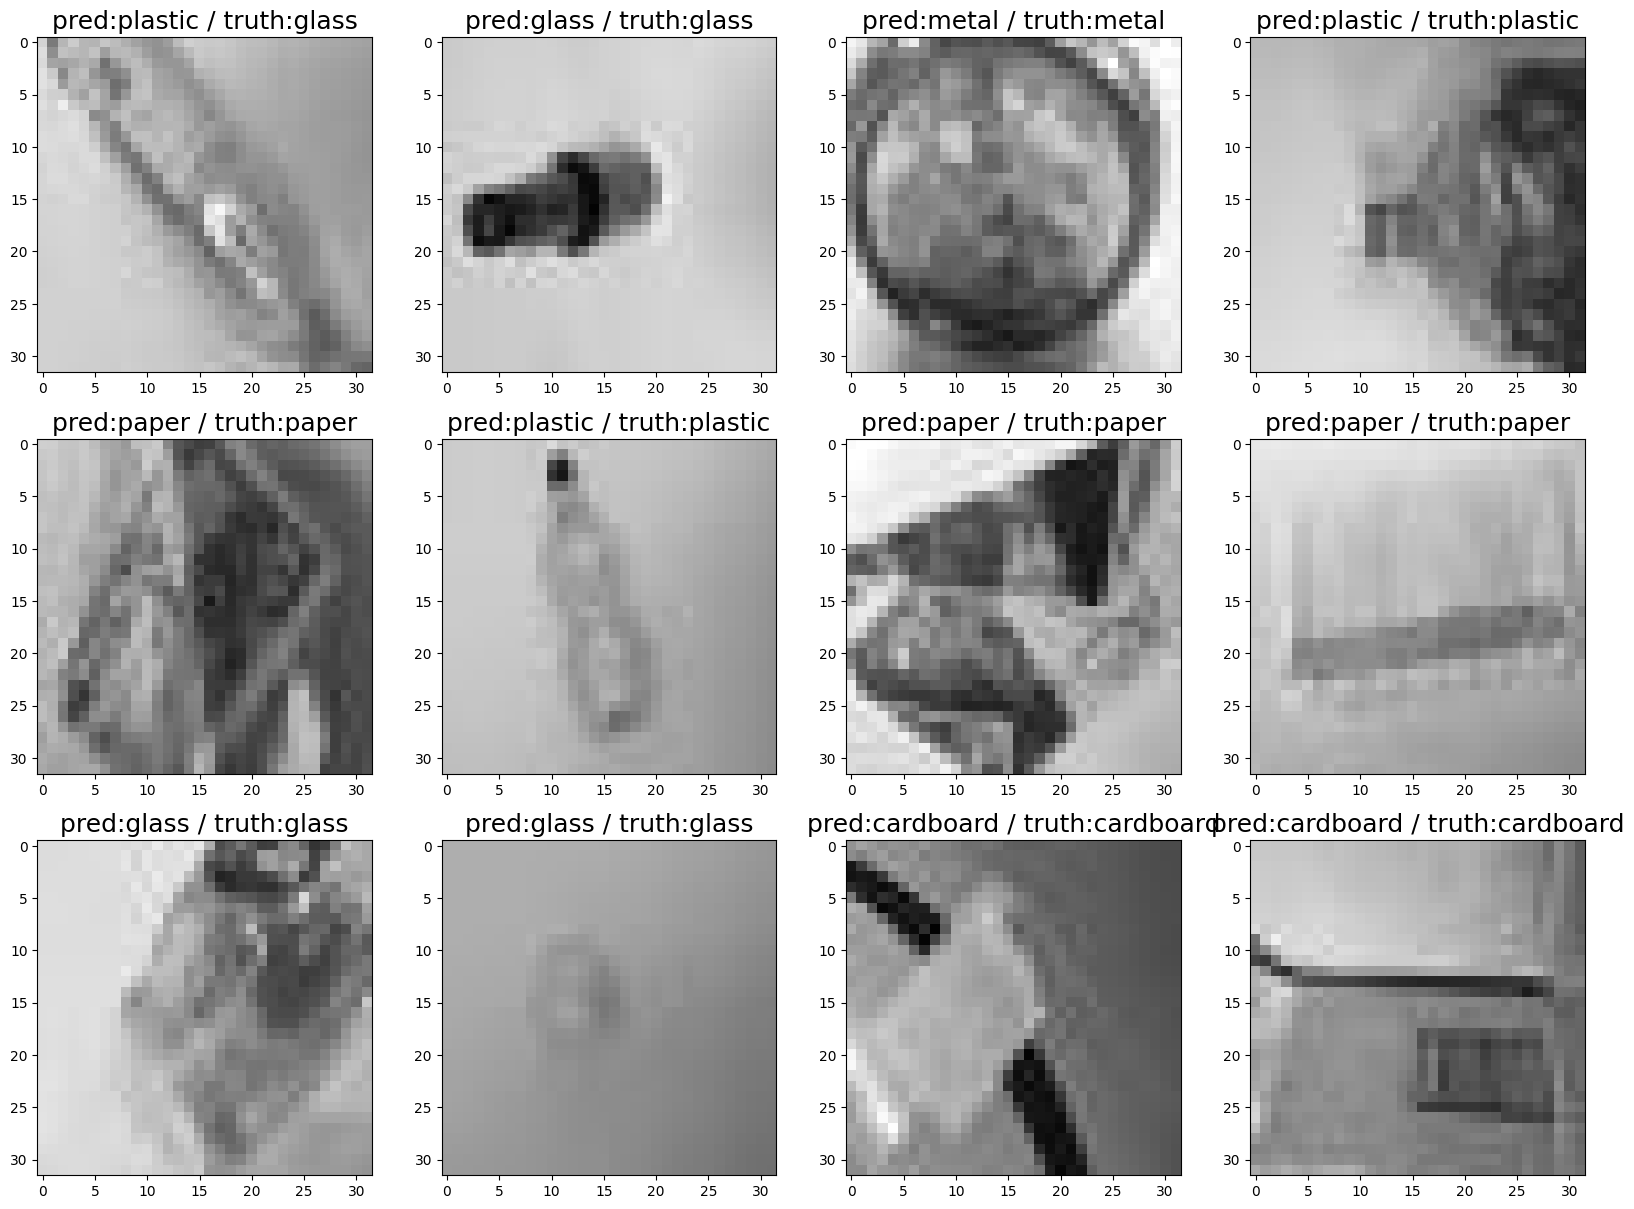

In [31]:
test_x, test_y = train_data_gen.__getitem__(1)
# test_x is used to train the data
# test_y refers to the actual answer of the testing set data
# preds refers to the predicted class
preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])
#shows some testing results

---
### Class: Cardboard

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Probability: 0.9465726
Classified: cardboard 
 cardboard


Text(0.5, 1.0, 'Loaded Image')

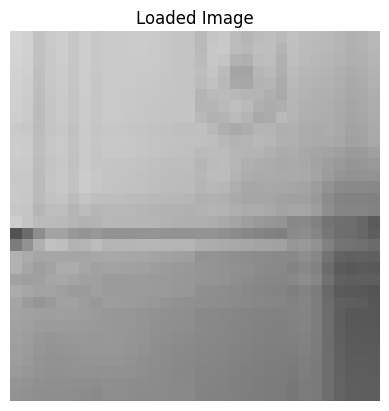

In [32]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\cardboard\cardboard_001.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n' , number_to_class[np.argmax(test_img[0])])

plt.axis('off')
plt.imshow(img.squeeze())
plt.imshow(img)
plt.title("Loaded Image")

---
### Class: Glass

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Probability: 0.5916041
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

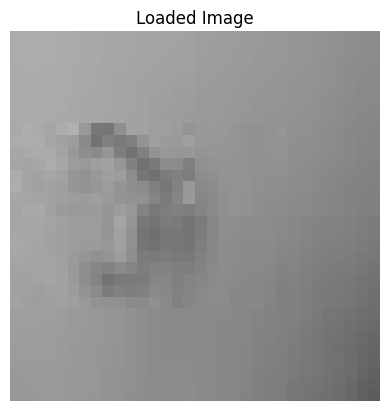

In [33]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\glass\glass_002.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Metal
---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Probability: 0.9886206
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

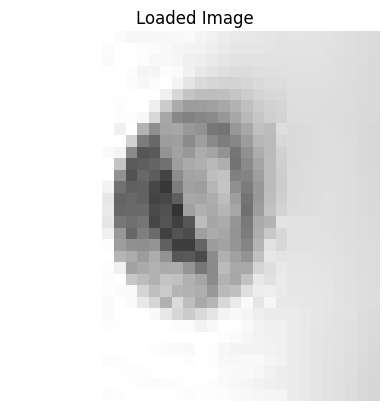

In [34]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\metal\metal_002.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Paper

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Probability: 0.98351717
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

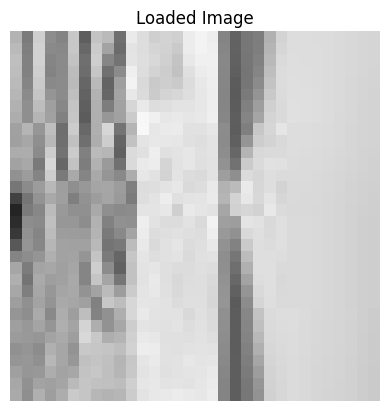

In [35]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\paper\paper_002.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Plastic

---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Probability: 0.77948165
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

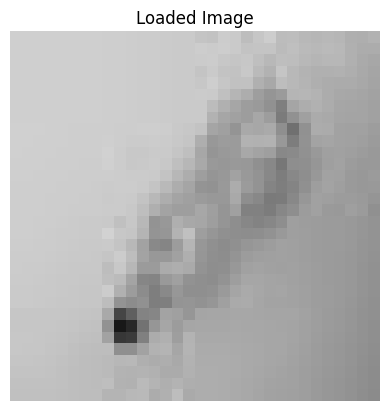

In [36]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\plastic\plastic_002.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Trash
---

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Probability: 0.9173189
Classified: trash 



Text(0.5, 1.0, 'Loaded Image')

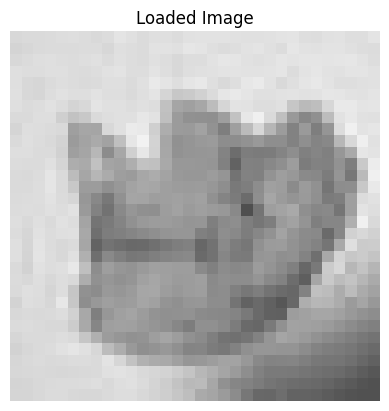

In [37]:
test_img = r"C:\Users\HP\tejasri\project\data\CODE\garbage-classification-main\garbage-classification-main\Garbage\processed_images\trash\trash_002.jpg"
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")